### Now Financial Economics Theory

**"Most claimed research findings in financial economics are likely false"**,      
$\;\;\;\;\;$        -Campbell Harvey (President of American Finance Assoication, 2015)

# Empirics: Mean Variance Frontier

- One of the area where computational power lacked, so intractable area in finance
 **$$\text{Dynamic Portfolio Optimization}$$**
 
- waiting for Quantum Computing
   - see [Economist Article: Proof emerges that a quantum computer can outperform a classical one](https://www.economist.com/science-and-technology/2019/09/26/proof-emerges-that-a-quantum-computer-can-outperform-a-classical-one)

## data loading

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

In [2]:
data = pd.read_csv("c:/python/data/pff/data_close.csv")
data.set_index('Date', inplace=True)
data = data.dropna()
ret = data.pct_change()
ret = ret.dropna()

In [3]:
assets = ['AAPL', 'MSFT', 'GS', 'GLD']
data = data[assets]
ret =ret[assets]
noa = len(assets)

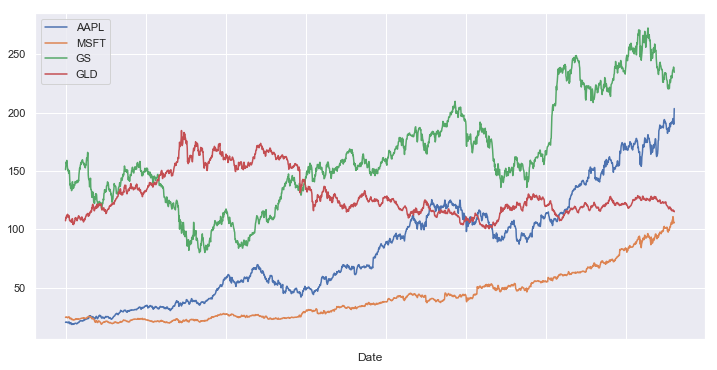

In [4]:
# plot 
import matplotlib.dates as mdates
import matplotlib.axis as mpa

ax = data.plot(figsize=(12,6))

## Portfolio mean and variance

In [5]:
# ret means 

ret.mean()*250 

AAPL    0.340744
MSFT    0.221538
GS      0.096510
GLD     0.024264
dtype: float64

In [6]:
ret.cov()*250 

AAPL      MSFT        GS       GLD
AAPL  0.074619  0.027978  0.026615  0.002039
MSFT  0.027978  0.058804  0.031377 -0.001015
GS    0.026615  0.031377  0.076999 -0.003675
GLD   0.002039 -0.001015 -0.003675  0.029969

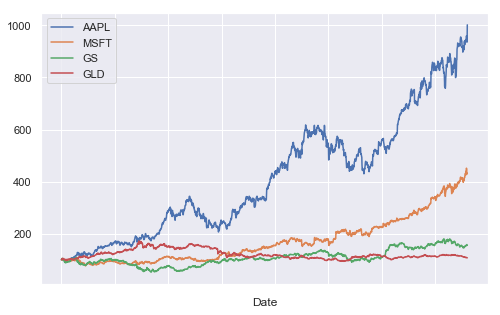

In [7]:
# normalized view 

(data / data.iloc[0] * 100).plot(figsize=(8, 5))

In [8]:
# generate random number [0,1) and scaled sum to one 

weights = np.random.random(noa)
weights /= sum(weights)

**Expected portfolio return**

\begin{align*}
\text{(expeted return)} \equiv \mu_p &= E\left( \sum_{i=1}^{n} \omega_i r_i   \right) \\
&= \sum_{i=1}^{n} \omega_i \mu_i  
\end{align*}

In [9]:
# expected return
np.sum(weights * ret.mean() *250)

0.20458847673825398

**Expected portfolio Variance**

\begin{align*}
\text{(expeted portfolio return variance)} \equiv \sigma_p &= Var\left( \sum_{i=1}^{n} \omega_i r_i   \right) \\
&= \sum_{i=1}^{n} \omega_i^2 \sigma_{ij},~~~ \left(\text{where}~~~  \sigma_{ij} = \text{covariance}= E \left[(r_i - \mu_i)(r_j - \mu_j)   \right]\right) \\
&=\omega^T \Sigma \omega
\end{align*}

\begin{align*}
\Sigma &=
\begin{bmatrix}
    \sigma_{11} & \sigma_{12} & \sigma_{13} & \dots  & \sigma_{1n} \\
    \sigma_{21} & \sigma_{22} & \sigma_{23} & \dots  & \sigma_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \sigma_{n1} & \sigma_{n2} & \sigma_{n3} & \dots  & \sigma_{nn} \\
 \end{bmatrix} \\\\
\end{align*}

In [10]:
# expected portfolio variance 

#weights.shape
#np.dot(ret.cov()*250, weights)
port_var = np.dot(weights.T, np.dot(ret.cov()*250, weights))
port_std = np.sqrt(port_var)
port_std

0.19731869529747761

## Simulation: $(\mu, \Sigma)$ with various weights

In [11]:
import numpy as np
import pandas as pd 

In [14]:
noa = 4
port_rets = []
port_std = []

for w in range(2500):
    weight = np.random.random(noa)
    weight /= np.sum(weight)
    mu, sig = ret_std(weight, ret)
#     print(mu, sig)
    port_rets.append(mu)
    port_std.append(sig)

In [13]:
def ret_std(weight, ret):
    port_mean = np.sum(weight * ret.mean() *250)
    port_var = np.dot(weight.T, np.dot(ret.cov()*250, weight))
    port_std = np.sqrt(port_var)
    return port_mean, port_std

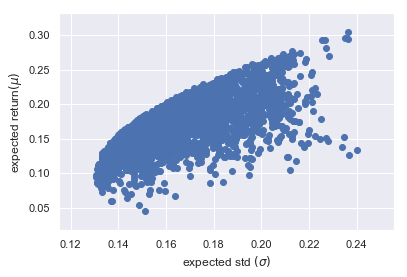

In [15]:
plt.scatter(port_std, port_rets)
plt.xlabel('expected std $(σ)$')
plt.ylabel('expected return$(μ)$');

**more fancy ways with the theoretical/practical background**
- $\text{sharpe ratio} = \frac{\mu_p-r_f}{\sigma_p}$, where $r_f$ is risk free rate assuming zero here

In [16]:
sr = np.array(port_rets)/np.array(port_std)

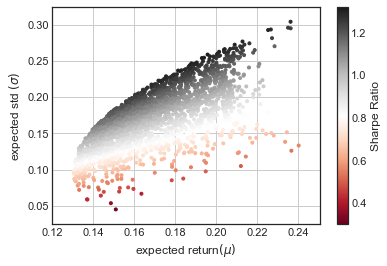

In [17]:
plt.style.use('seaborn-white')
plt.scatter(port_std, port_rets, c=sr,marker='.',  cmap='RdGy')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('expected return$(μ)$')
plt.ylabel('expected std $(σ)$');
plt.grid()

## Optimization: weights maximizing the Sharpe ratio
\begin{align*}
max_{w_i's} (sr)\equiv \frac{r_p-r_f}{\sigma_p} \\
~~& s.t   \sum w_i =1 , 0 \le w_i \le 1
\end{align*}

In [58]:
import scipy.optimize as opt 

In [61]:
?opt.minimize

In [19]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [20]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
noa * [1. / noa,]

[0.25, 0.25, 0.25, 0.25]

In [57]:
?opt

In [25]:
opts = opt.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [26]:
opts 

     fun: -1.327922877125927
     jac: array([ 1.46761537e-04, -2.25424767e-04,  3.12087566e-01, -1.90928578e-04])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.96718278e-01, 3.07019423e-01, 3.79470760e-18, 9.62622992e-02])

In [27]:
opts.x.round(3)

array([0.597, 0.307, 0.   , 0.096])

In [28]:
statistics(opts['x']).round(3)

array([0.276, 0.208, 1.328])

<div class="alert alert-block alert-info"> Sharpe-Ration minization results  </div>

-  ** return: 27.6%**
-  **risk: 20.8% **
-  **Sharpe-Ration=1.32**

## Optimization: weights minimizing variance (volatility)
\begin{align*}
min_{w_i's} \sigma_p^2 \\
~~& s.t   \sum w_i =1 , 0 \le w_i \le 1
\end{align*}

In [29]:
import scipy.optimize as opt

In [30]:
def min_func_volatility(weights):
    return statistics(weights)[1] **2

In [31]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in range(noa))
noa * [1. / noa,]

[0.25, 0.25, 0.25, 0.25]

In [32]:
optv = opt.minimize(min_func_volatility, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [33]:
optv.x.round(3)

array([0.093, 0.179, 0.143, 0.584])

In [34]:
statistics(optv['x']).round(3)

array([0.1  , 0.131, 0.766])

## Optimization: Optimal Portfolio Frontier
\begin{align*}
min_{w_i's} \sigma_p^2 \\
~~& s.t   \sum w_i =1 , 0 \le w_i \le 1,   r_p = \bar{r}
\end{align*}

In [35]:
import scipy.optimize as opt

In [36]:
def min_func_port(weights):
    return statistics(weights)[1]

In [37]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [38]:
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = opt.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

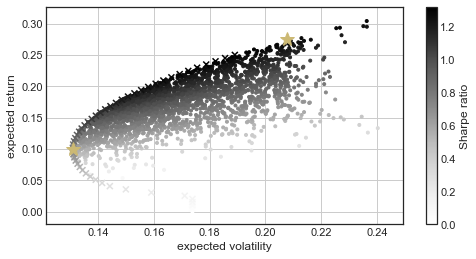

In [39]:
plt.figure(figsize=(8, 4))
plt.scatter(port_std, port_rets,
            c=np.array(port_rets) / np.array(port_std), marker='.')
            # random portfolio composition
plt.scatter(tvols, trets,
            c= trets / tvols, marker='x')
            # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'y*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### Capital Market Line

In [40]:
import scipy.interpolate as sci
import scipy.optimize as sco

In [41]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [42]:
tck = sci.splrep(evols, erets)

In [43]:
opt = sco.fsolve(equations, [0.01, 0.6, 0.65])

C:\Users\chung\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


In [44]:
opt

array([0.01      , 1.34915968, 0.21221246])

In [45]:
np.round(equations(opt), 6)

array([ 0.      ,  0.014222, -0.00302 ])

In [46]:
prets = np.array(port_rets)
pvols = np.array(port_std)

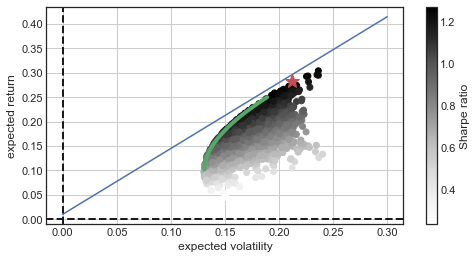

In [47]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_4
# title: Capital market line and tangency portfolio (star) for risk-free rate of 1%
# size: 90

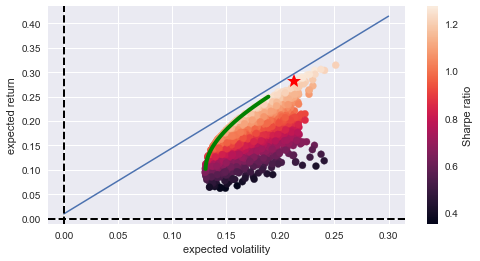

In [100]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
# tag: portfolio_4
# title: Capital market line and tangency portfolio (star) for risk-free rate of 1%
# size: 90

**Portfolio weight for optimal point**

In [48]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [49]:
res['x'].round(3)

array([0.614, 0.311, 0.   , 0.075])

In [50]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [23]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [22]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(ret.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(ret.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])